In [1]:
import pandas as pd
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from plotly import tools
from plotly.graph_objs import Line, Marker
from collections import Counter
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/Intermediate/Clean_Numeric.csv')

In [3]:
df.head(5)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,Mean_Sent_Pol,Total_Review_By_Listing
0,29268359,29722553,3,1.0,2,2.0,1,2,27,4,...,4.86,4.38,1,1.58,82.0,82.0,3,1125,0.354923,41
1,26312130,13033219,4,1.0,1,1.0,1,2,27,17,...,4.71,4.41,0,0.44,120.0,120.0,5,1125,0.461938,15
2,24682460,4267212,1,1.0,1,1.0,1,2,46,13,...,4.46,4.75,0,0.68,130.0,130.0,3,1125,0.448609,20
3,7871143,1826139,3,1.0,2,8.0,1,2,27,5,...,5.00,4.78,0,0.29,700.0,700.0,5,1124,0.469723,17
4,30778548,4621039,1,1.0,1,1.0,1,2,27,20,...,5.00,4.00,0,0.06,160.0,160.0,3,1125,0.300000,2


In [4]:
df.drop(['id','host_id','has_availability'], axis=1, inplace=True)

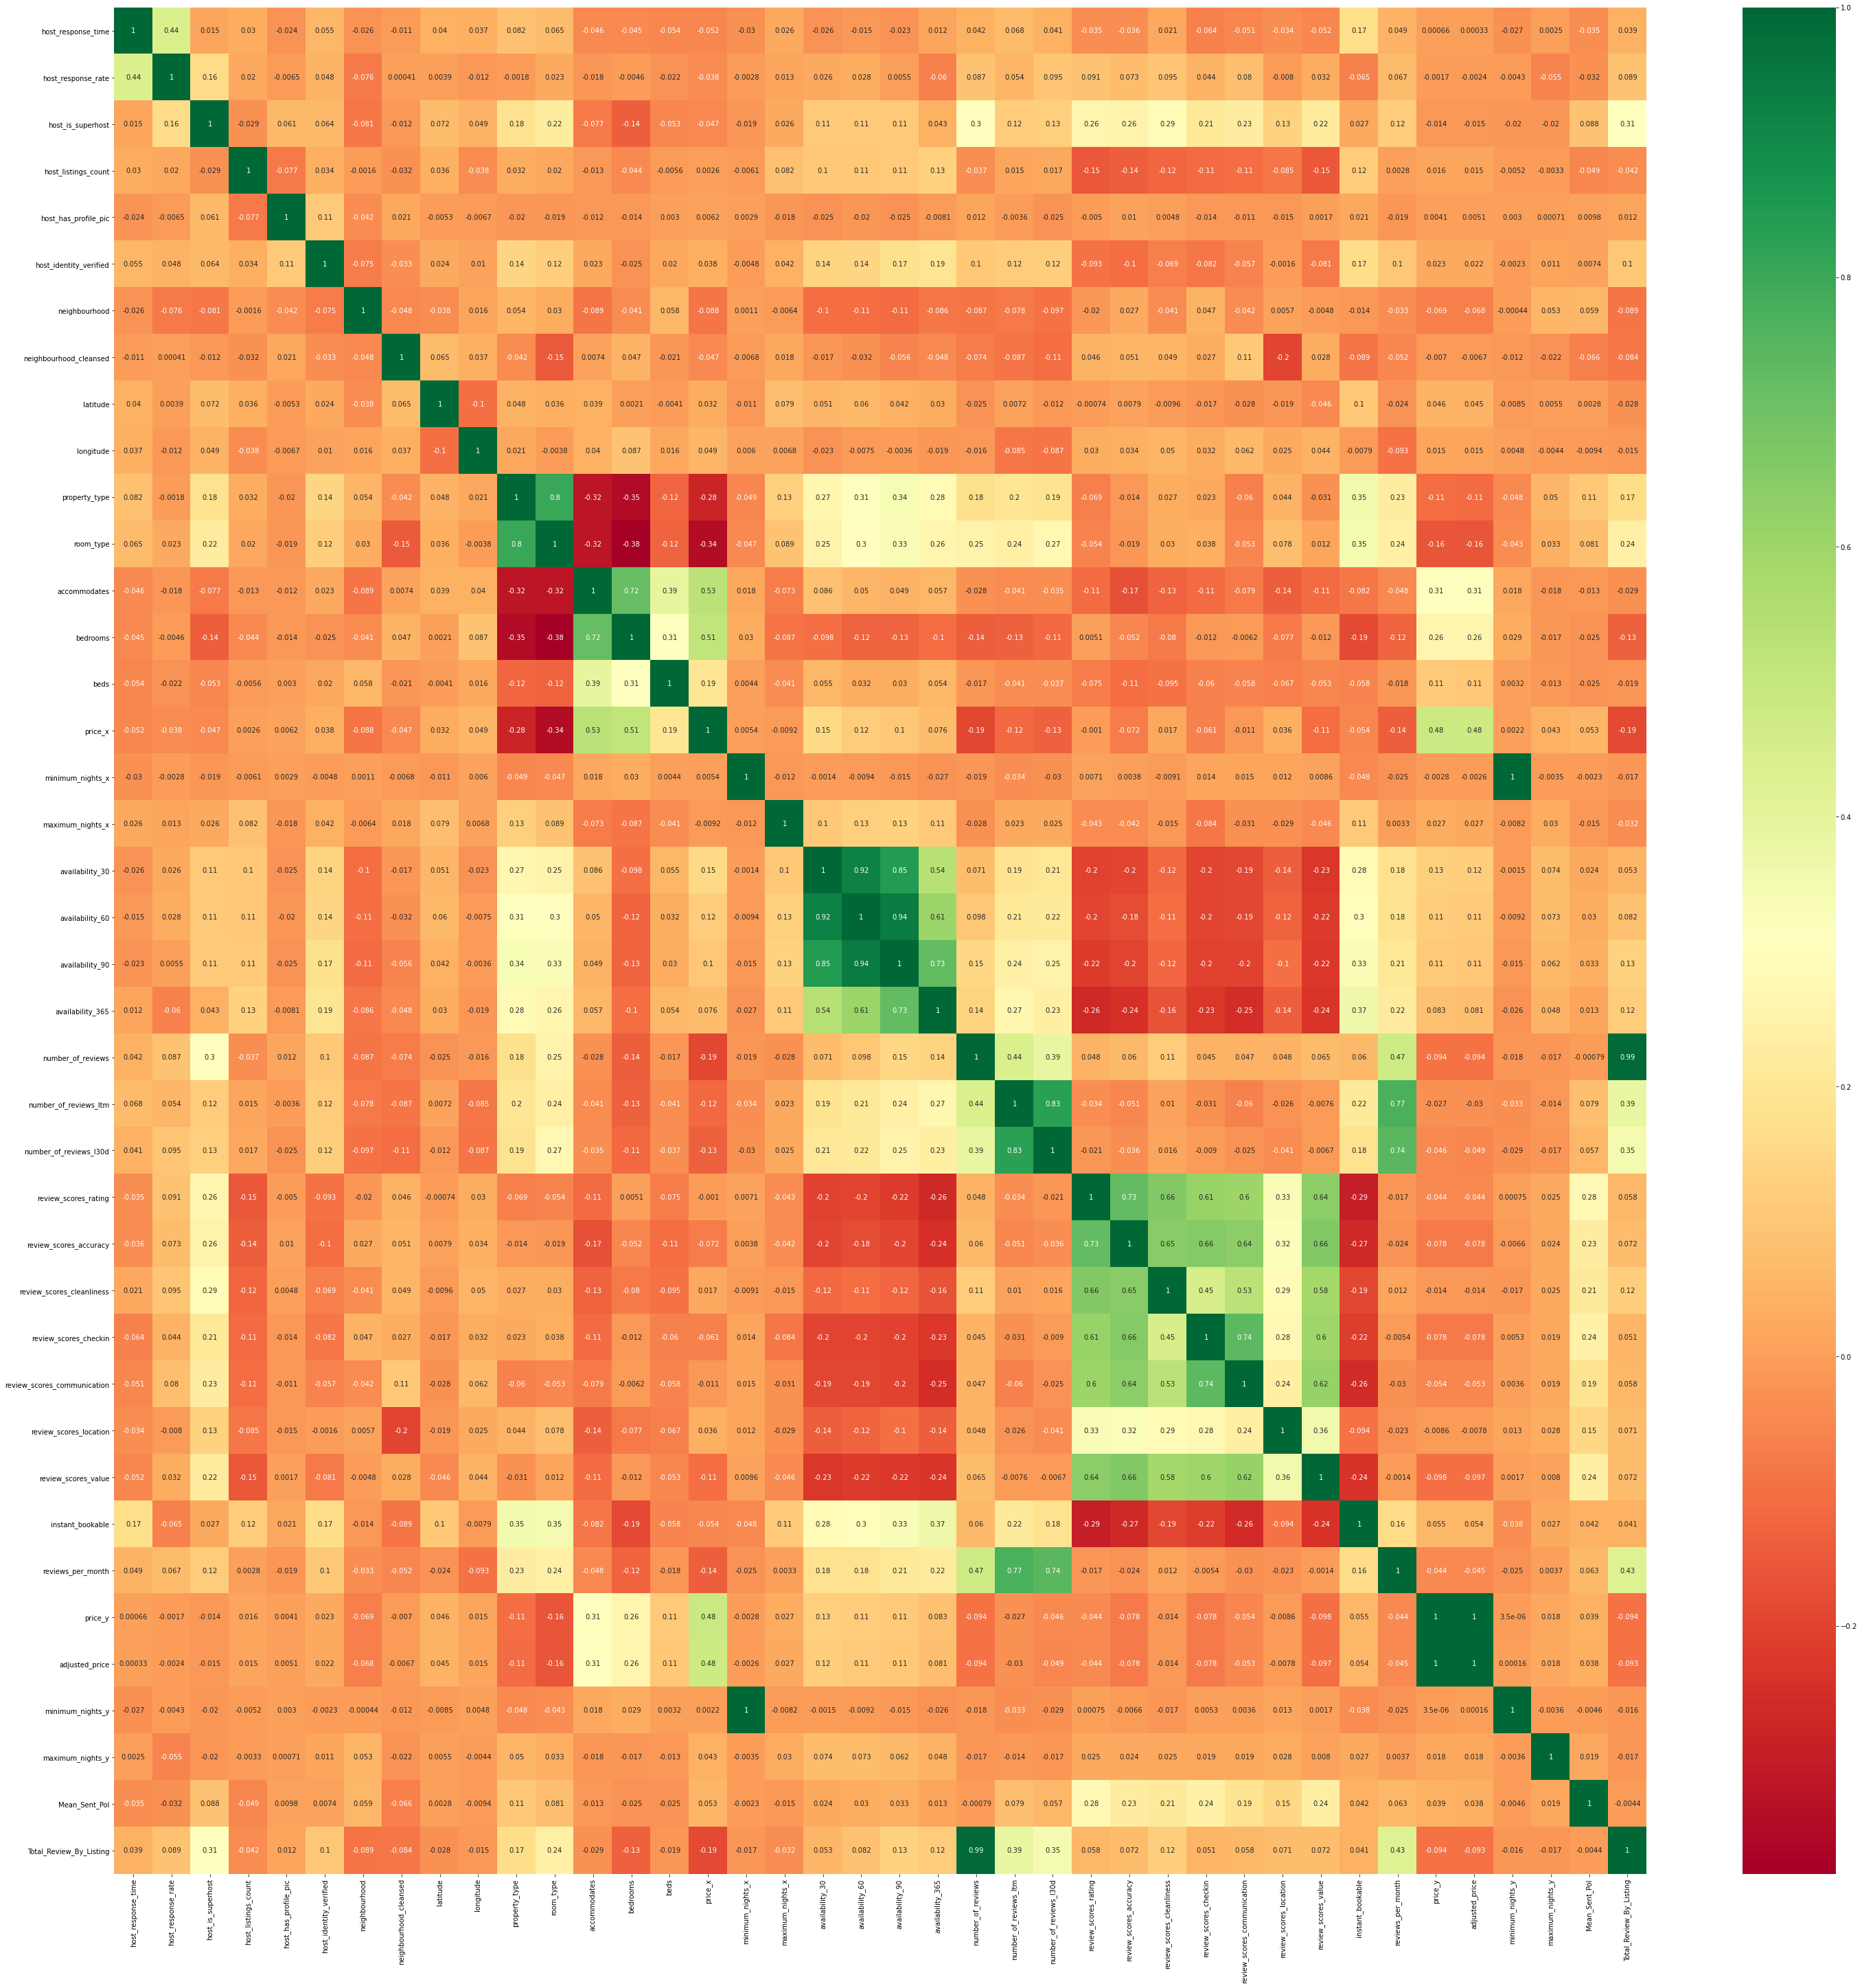

In [5]:
#plotting heatmap to find out which features are highly correlated among themselves 
import seaborn as sns

X = df.iloc[:,:]
y = df.loc[:,:]   
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
#function to drop columns which are highly correlated with each other

def filter_df_corr(inp_data, corr_val):
    
    # Creates Correlation Matrix
    if isinstance(inp_data, np.ndarray):
        inp_data = pd.DataFrame(data=inp_data)
        array_flag = True
    else:
        array_flag = False
    corr_matrix = inp_data.corr(method='spearman')

    # Iterates through Correlation Matrix Table to find correlated columns
    drop_cols = []
    n_cols = len(corr_matrix.columns)

    for i in range(n_cols):
        for k in range(i+1, n_cols):
            val = corr_matrix.iloc[k, i]
            col = corr_matrix.columns[i]
            row = corr_matrix.index[k]
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col, "|", row, "|", round(val, 2))
                drop_cols.append(col)

    # Drops the correlated columns
    drop_cols = set(drop_cols)
    inp_data = inp_data.drop(columns=drop_cols)
    # Return same type as inp
    if array_flag:
        return inp_data.values
    else:
        return inp_data

In [7]:
df_BACKUP=df.copy()


In [18]:
df=df_BACKUP.copy()

In [19]:
corr_df=df.drop(['price_x'],axis=1) #dropping price_column

In [20]:
#dropping column having correlation > 0.6 with each other and selecting only one of them
corr_df=filter_df_corr(corr_df,0.85)

availability_30 | availability_60 | 0.93
availability_30 | availability_90 | 0.87
availability_60 | availability_90 | 0.96
number_of_reviews | Total_Review_By_Listing | 0.99
price_y | adjusted_price | 1.0


In [21]:
corr_df.shape

(29842, 35)

In [22]:
corr_df.head(5)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,adjusted_price,minimum_nights_y,maximum_nights_y,Mean_Sent_Pol,Total_Review_By_Listing
0,3,1.0,2,2.0,1,2,27,4,52.37032,4.90575,...,4.73,4.86,4.38,1,1.58,82.0,3,1125,0.354923,41
1,4,1.0,1,1.0,1,2,27,17,52.36013,4.92895,...,5.00,4.71,4.41,0,0.44,120.0,5,1125,0.461938,15
2,1,1.0,1,1.0,1,2,46,13,52.41985,4.90131,...,5.00,4.46,4.75,0,0.68,130.0,3,1125,0.448609,20
3,3,1.0,2,8.0,1,2,27,5,52.37959,4.89460,...,5.00,5.00,4.78,0,0.29,700.0,5,1124,0.469723,17
4,1,1.0,1,1.0,1,2,27,20,52.37416,4.87423,...,5.00,5.00,4.00,0,0.06,160.0,3,1125,0.300000,2


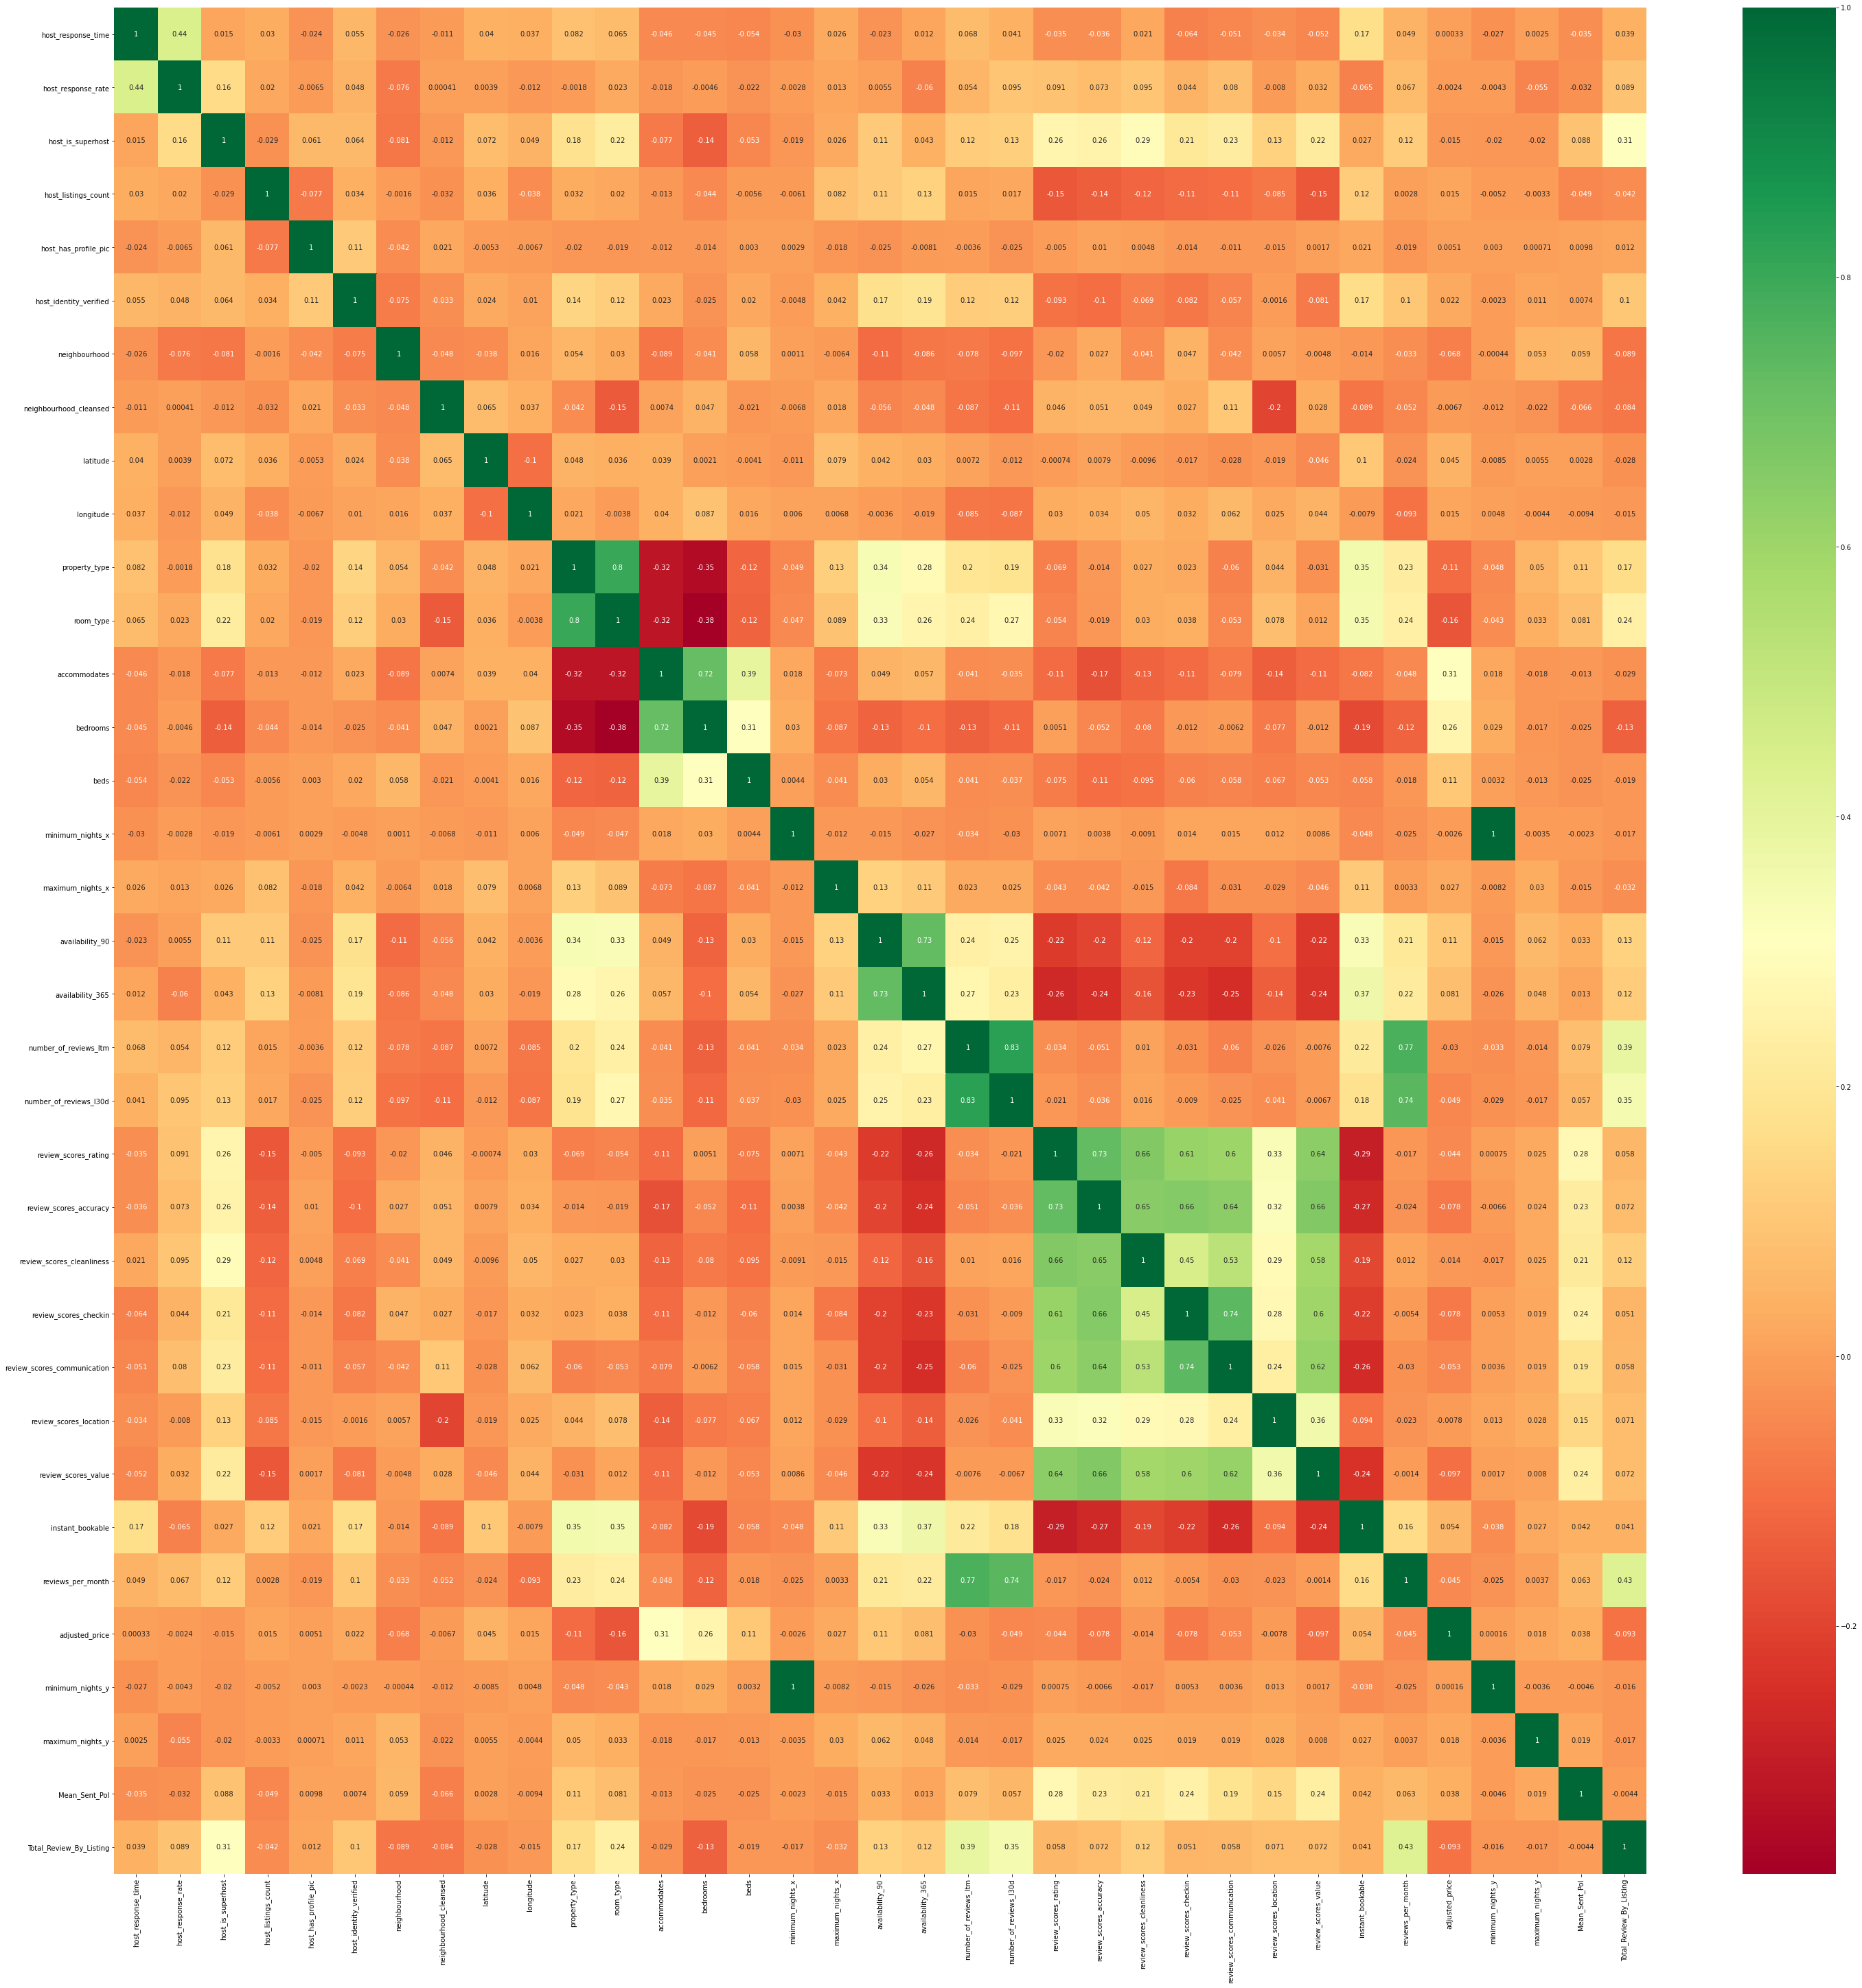

In [23]:
#heatmap after dropping correlated features

X = corr_df.iloc[:,:]
y = corr_df.loc[:,:]   
#get correlations of each features in dataset
corrmat = corr_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [24]:
#adding price_column back to dataframe
corr_df['price_x'] = df['price_x']

In [29]:
#using selectkbest from  sklearn.feature_selection to find the top features. 
#Its a type of univariate feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = corr_df.iloc[:,:]
y = corr_df.loc[:,'price_x'] 

bestfeatures = SelectKBest(score_func=f_classif, k='all')
ft = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(ft.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
selected_features = featureScores.sort_values(by=['Score'],ascending=False).head(10)  #print 10 best features

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning:

divide by zero encountered in true_divide



In [31]:
selected_features.to_csv('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/Intermediate/selected_features_v2.csv',index=None)